<a href="https://colab.research.google.com/github/dbarrer5/milestone-02/blob/main/Mini_Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Assignment 9. Data Aggregartion
Please add one code cell after each question and create a program to answer the question. Make sure your code runs without error. After you are finished, click on File -> Print -> Save as PDF to create a PDF output and upload it on Brightspace.

NOTE: Make sure your PDF does not have your name or any identifying information in the name or content of the file. Anonymity is essential for the peer-review process.

## Black Friday: Data Description
Here we have the dataset for Black Friday shoppers' purchase records acquired from Kaggle and available for [download here](https://drive.google.com/file/d/1IOvYog7JUWUAYzSRUTmJ20lDkUsVl6dX/view?usp=sharing). The dataset includes 12 columns and more than 500K rows. It contains the following variables:

* **User_ID**
* **Product_ID**
* **Gender**
* **Age**
* **Occupation**
* **City_Category**
* **Stay_In_Current_City_Years**
* **Marital_Status**
* **Product_Category_1**
* **Product_Category_2**
* **Product_Category_3**
* **Purchase**

1. Read the dataset into a dataframe, and check out the first few rows and column data types.

In [ ]:
import pandas as pd
from dateutil.parser import parser
df = pd.read_csv('BlackFriday.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


2. Display the min, average, and max of Purchase. It should be calculated and displayed in the same command.

In [ ]:
df.Purchase.agg(['min','mean','max'])

min       185.000000
mean     9333.859853
max     23961.000000
Name: Purchase, dtype: float64

3. Display the number of products sold in each 'Product_Category_1'. Next, display the number of **UNIQUE** products sold in each 'Product_Category_1'.

 **Hint:** for the second part of the question, you may use .nunique() to count the number of unique items in any group.

In [ ]:
df.groupby('Product_Category_1').Product_ID.count() #number of products

Product_Category_1
1     138353
2      23499
3      19849
4      11567
5     148592
6      20164
7       3668
8     112132
9        404
10      5032
11     23960
12      3875
13      5440
14      1500
15      6203
16      9697
17       567
18      3075
Name: Product_ID, dtype: int64

In [ ]:
df.groupby('Product_Category_1').Product_ID.nunique()

Product_Category_1
1      491
2      152
3       90
4       88
5      966
6      119
7      102
8     1047
9        2
10      25
11     254
12      25
13      35
14      44
15      44
16      98
17      11
18      30
Name: Product_ID, dtype: int64

4. Use groupby to display the average and standard deviation of the Purchase for each Gender and City_Category. Round the numbers to show only one decimal place.

In [ ]:
df.groupby(['Gender','City_Category']).agg({'Purchase':['mean','std']}).round(1)

Purchase        
                         mean     std
Gender City_Category                 
F      A               8630.8  4642.5
       B               8590.5  4648.5
       C               9265.0  4854.4
M      A               9061.7  4931.4
       B               9400.8  4999.9
       C              10033.2  5175.9

5. Display the top three most profitable customers (User_ID & total purchase should be displayed). 

 **Hint:** you should get the sum of Purchase for each customer and then use an aggregate function that displays the top largest customers in terms of their purchase. This should be all calculated and displayed in the same command.

In [ ]:
df.groupby(['User_ID']).agg({'Purchase':'sum'}).sort_values(['Purchase'],ascending=False)

,Purchase
User_ID,
1004277,10536783
1001680,8699232
1002909,7577505
1001941,6817493
1000424,6573609
...,...
1004464,46091
1005944,46070
1005012,45551


In [ ]:
#Top 3 largest customers
#User_ID 100427, 1001680, 1002909

6. Use pivot table to display the total Purchase for each Product_Category_1 (rows) and Gender (columns). Next, use the pivot table to create a line plot with two lines: one for male purchase across categor_1, and another for female purchase across category_1. Set proper line style, marker, color, legend, plot title, and axes labels. 

 Which category_1 values are more popular for each of the male and female customers?

In [ ]:
df.pivot_table(values = 'Purchase', index='Product_Category_1', columns = 'Gender', aggfunc = 'sum')

Gender,F,M
Product_Category_1,,
1,331792660,1550873665
2,63581729,200915513
3,60278495,140133716
4,8774919,18163038
5,259800713,667116784
6,69832027,249523259
7,15234822,44824387
8,247067491,593625903
9,1100702,5176770


Text(0.5, 1.0, 'Total Purchases')

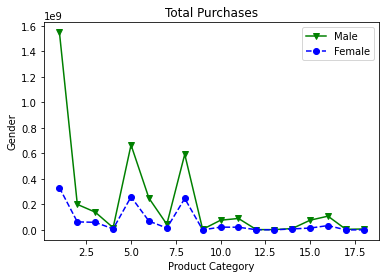

In [ ]:
import matplotlib.pyplot as plt
purchase = df.pivot_table(values = 'Purchase', index='Product_Category_1', columns = 'Gender', aggfunc = 'sum')
plt.plot(purchase.M, linestyle = '-', marker = 'v', color = 'green', label = 'Male')
plt.plot(purchase.F, linestyle = '--', marker = 'o', color = 'blue', label = 'Female')
plt.legend()
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.title('Total Purchases')

In [ ]:
#The categories that were the most popular were product category 1,5, and 7.5 for both males and females but higher for males